# Разработка алгоритма для защиты данных.

# План работ:

1. Загрузка и предобработка данных.
2. Доказательство алгоритма умножения матриц на обратимую матрицу
3. Проверка алгоритма(совпадение метрики R2 на исходных и изменённых данных)
4. Вывод.

# Описание данных:

- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## 1. Загрузка данных

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
clients = pd.read_csv('datasets/insurance.csv')

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
clients

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Данные загрузили. Выглядят они отлично.  

Проверим дубликаты:

In [5]:
clients.duplicated().sum()

153

Дубликаты есть. Избавимся от них:

In [6]:
clients = clients.drop_duplicates().reset_index(drop=True)
clients

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4842,0,28.0,35700.0,2,0
4843,0,34.0,52400.0,1,0
4844,0,20.0,33900.0,2,0
4845,1,22.0,32700.0,3,0


Разобьём данные на признаки и целевой признак и проверим корреляцию признаков:

In [7]:
target = clients.loc[:, 'Страховые выплаты']
features = clients.drop(['Страховые выплаты'], axis=1)

In [8]:
for i in features:
    for j in features:
        correl = features[j].corr(features[i])
        if j != i and (correl > 0.02 or correl < -0.02):
            print(f'{j} corr {i}:{correl}')

Члены семьи corr Зарплата:-0.031686583275423105
Зарплата corr Члены семьи:-0.031686583275423105


Признаки не коррелируют друг с другом.  

Посмотрим на распределения:

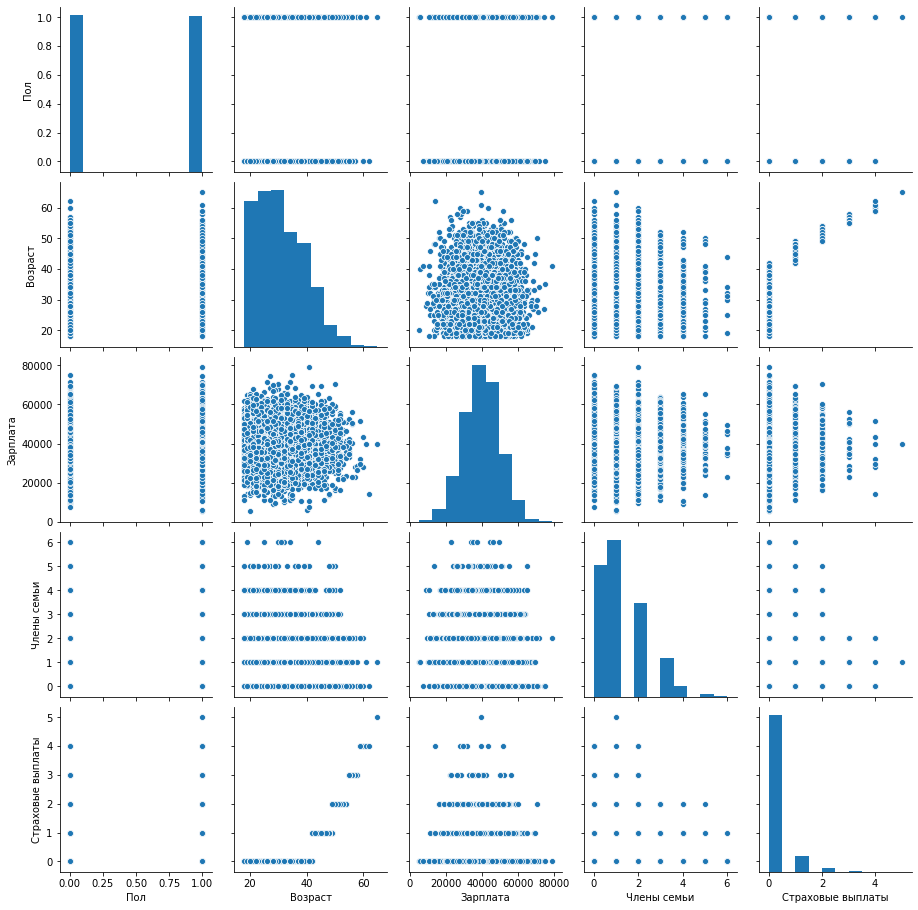

In [9]:
sns.pairplot(clients)

Данные проверены и подчищены. Можно идти дальше.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Есть данные на базе) 

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  
b. Качество линейной регрессии не изменится.

**Обоснование:**

$$X'=XP$$  
$$a'=X'w'$$  
$$w'=(X'^TX')^{-1}X'^Ty$$  
$$a'=XPw'$$  
$$w'=((XP)^TXP)^{-1}(XP)^Ty$$  
$a'=XP((XP)^TXP)^{-1}(XP)^Ty$  
$a'=XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$  
$a'=XPP^{-1}(X^TX)^{-1}EX^Ty$  
$a'=XPP^{-1}(X^TX)^{-1}X^Ty$  
$a'=XPP^{-1}w$  
$$w'=P^{-1}w$$  
$a'=XEw$  
$a'=Xw$  
$$a = Xw = X'w' = a'$$  

Матрица(X) умножается на обратимую матрицу(P). Получается матрица X', она же XP.  
В формулу предсказаний(a), вместо матрицы X, подставляется произведение матрицы X на обратимую матрицу P (XP), в результате получаем формулу предсказаний a'.  
В результате манимупляций со свойствами матриц, предсказания(a') равны Xw, что равно предсказаниям не умноженной матрицы X.

## 3. Проверка алгоритма

Разобъём признаки на test и trein для проверки алгоритма:

In [10]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

Преобразуем выборки в матрицы:

In [11]:
matrix_features_train = features_train.values
matrix_features_test = features_test.values

In [12]:
matrix_features_train.shape

(3877, 4)

Сделаем рандомную обратимую матрицу 4 на 4 по количеству признаков основной матрицы:

In [13]:
random_matrix = np.random.randn(4, 4)
random_matrix

array([[-0.01969801, -0.41049162, -0.86168775, -0.10935783],
       [-0.97913032,  0.25909935,  1.71488446, -0.73868929],
       [-2.04745665, -1.05008521, -2.19993615,  0.46224392],
       [-0.31268156, -0.67189867, -0.94129603,  0.6173193 ]])

Проверим получившеюся матрицу на обратимость. Для этого умножим её на обратную ей матрицу. В результате должна получиться единичная матрица - та матрица, у которой по главной диаганали единицы, а остальное - нули.

In [14]:
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1., -0., -0., -0.],
       [ 0.,  1., -0.,  0.],
       [-0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

Получилась единичная матрица - значит, что матрица обратима.

Перемножим тестовую и тренировочную матрицы на получившуюся рандомную обратимую матрицу:

In [15]:
encrypted_matrix_features_train = matrix_features_train.dot(random_matrix)
encrypted_matrix_features_test = matrix_features_test.dot(random_matrix)

Для проверки попробуем перемножить признаки трэйн на обратную рандомной матрицу:  

In [16]:
de_encrypted_matrix_features_train = encrypted_matrix_features_train.dot(np.linalg.inv(random_matrix))

Воссоздадим DataFrame из матрицы:

In [17]:
features_train_check = pd.DataFrame(de_encrypted_matrix_features_train, columns=features_train.columns)

Округлим до целых чисел:

In [18]:
features_train_check = np.round(features_train_check)

In [19]:
features_train

,Пол,Возраст,Зарплата,Члены семьи
637,0,28.0,29600.0,0
4373,0,26.0,57100.0,1
1603,1,38.0,41700.0,1
3369,1,23.0,34000.0,1
1792,0,45.0,35100.0,2
...,...,...,...,...
3497,1,23.0,28200.0,1
3492,0,30.0,33700.0,1
2177,1,20.0,28900.0,1
3557,1,33.0,38800.0,1


In [20]:
features_train_check

,Пол,Возраст,Зарплата,Члены семьи
0,0.0,28.0,29600.0,0.0
1,-0.0,26.0,57100.0,1.0
2,1.0,38.0,41700.0,1.0
3,1.0,23.0,34000.0,1.0
4,-0.0,45.0,35100.0,2.0
...,...,...,...,...
3872,1.0,23.0,28200.0,1.0
3873,-0.0,30.0,33700.0,1.0
3874,1.0,20.0,28900.0,1.0
3875,1.0,33.0,38800.0,1.0


Ответы совпадают. Переходим к Линейной регрессии. Создадим 2 модели - для нормальных данных и для умноженных на обратимую матрицу:

In [21]:
model_normal = LinearRegression()
model_encrypted = LinearRegression()

Обучим и посмотрим на метрику R2 модели:  
Сначала нормальную:

In [22]:
model_normal.fit(matrix_features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pred_norm = model_normal.predict(features_test)

In [24]:
normal_r2 = model_normal.score(features_test, target_test)
normal_r2

0.4160549216151095

Теперь модель, обученную закодированной матрицей:

In [25]:
model_encrypted.fit(encrypted_matrix_features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
pred_enc = model_encrypted.predict(encrypted_matrix_features_test)

In [27]:
encrypted_r2 = model_encrypted.score(encrypted_matrix_features_test, target_test)
encrypted_r2

0.41605492161517255

Сравним результаты:

In [28]:
print(f'Результат не закодированной матрицы = {normal_r2}.\nРезультат закодированной матрицы = {encrypted_r2}.\nРазница = {normal_r2 - normal_r2}.')

Результат не закодированной матрицы = 0.4160549216151095.
Результат закодированной матрицы = 0.41605492161517255.
Разница = 0.0.


# 4. Вывод:  
Была проведена предобработка данных. Произведена проверка работы алгоритма модели линейной регрессии при перемножении на обюратимую матрицу. Произведена проверка влияния перемножения на обратимую матрицу, а затем перемножения на обратную матрицу обратимой. Произведена проверка метрики R2 Линейной регрессии на идентичных данных - сначала исходных, затем умноженных на обратимую матрицу, размер которой равен числу признаков. Метрики полностью совпали. Можно сделать вывод, что алгоритм работает.